# **Loading Libraries And Data**

In [1]:
'''import my libraries '''
import numpy as np
import pandas as pd
import seaborn as sns
import re 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
import warnings 
warnings.filterwarnings('ignore')

In [2]:
'''load training dataset'''
df = pd.read_csv('../input/covid-fake-news-dataset/data.csv')
df.head()

,headlines,outcome
0,A post claims compulsory vacination violates t...,0
1,A photo claims that this person is a doctor wh...,0
2,Post about a video claims that it is a protest...,0
3,All deaths by respiratory failure and pneumoni...,0
4,The dean of the College of Biologists of Euska...,0


# **EDA & Cleaning**

In [3]:
df.shape

(10201, 2)

In [4]:
df['outcome'].value_counts()

0    9727
1     474
Name: outcome, dtype: int64

<AxesSubplot:xlabel='outcome', ylabel='count'>

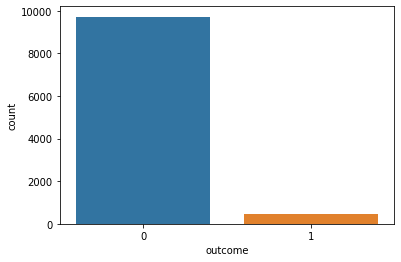

In [5]:
sns.countplot(df['outcome'])

**nulls Check**

In [6]:
df.isnull().sum()

headlines    0
outcome      0
dtype: int64

In [7]:
df['headlines']

0        A post claims compulsory vacination violates t...
1        A photo claims that this person is a doctor wh...
2        Post about a video claims that it is a protest...
3        All deaths by respiratory failure and pneumoni...
4        The dean of the College of Biologists of Euska...
                               ...                        
10196    A Chinese market caused the new coronavirus (v...
10197    The peak of the new coronavirus will happen in...
10198    Stores and supermarkets in Veracruz (Mexico) w...
10199    A chain message circulated on Tuesday, Jan. 14...
10200    Photo shows Muslims in Tamil Nadu state of Ind...
Name: headlines, Length: 10201, dtype: object

**nltk stopwords package**

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Stemming**

In [9]:
stem = PorterStemmer()
def stemming(content):
    content = re.sub('[^a-zA-Z]',' ',content)
    content = content.lower()
    content = content.split()
    content = [stem.stem(word) for word in content if not word in stopwords.words('english')]
    content = ' '.join(content)
    return content
df['headlines'] = df['headlines'].apply(stemming)

**X & y split**

In [10]:
X = df['headlines'].values
y = df['outcome'].values

# **Vectoriz**

In [11]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

**Train & Test split**

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=1)

# **Machine Learning Model**

In [13]:
sgd = SGDClassifier()     
sgd = sgd.fit(X_train,Y_train)
y_tpred = sgd.predict(X_train)
y_pred = sgd.predict(X_test)

In [14]:
print('train score :',accuracy_score(Y_train ,y_tpred ))
print('test score :',accuracy_score(Y_test , y_pred))
print('con matrix :',confusion_matrix(Y_test, y_pred))
print('report :',classification_report(Y_test, y_pred ))

train score : 0.985014005602241
test score : 0.9663508657301535
con matrix : [[2910    3]
 [ 100   48]]
report :               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2913
           1       0.94      0.32      0.48       148

    accuracy                           0.97      3061
   macro avg       0.95      0.66      0.73      3061
weighted avg       0.97      0.97      0.96      3061



# **Review the results**

**Confusion Matrix**

Confusion Matrix AxesSubplot(0.125,0.125;0.62x0.755)


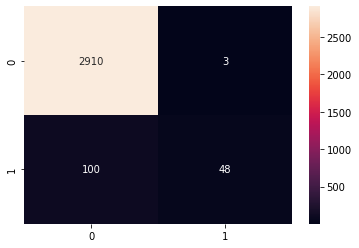

In [15]:
con = confusion_matrix(Y_test,y_pred)
hmap =sns.heatmap(con,annot=True,fmt="d")
print ('Confusion Matrix',hmap)

**Classification Report**

Classification Report AxesSubplot(0.125,0.125;0.62x0.755)


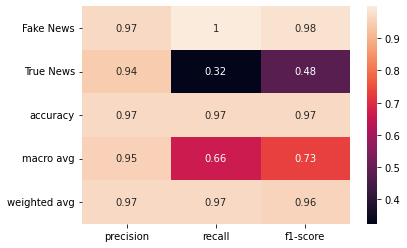

In [16]:
labels = np.arange(2)
clf_report = classification_report(Y_test,y_pred,labels=labels,target_names=('Fake News','True News'), output_dict=True)
hmap1 = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
print ('Classification Report',hmap1)